In [1]:


import numpy as np  # Doğrusal cebir için
import pandas as pd  # Veri işleme, CSV dosya okuma/yazma (örneğin, pd.read_csv)
import seaborn as sns  # Veri görselleştirme için
import matplotlib.pyplot as plt  # Matplotlib ile görselleştirme
import plotly.express as px  # Etkileşimli görselleştirme için Plotly Express
import plotly.graph_objs as go  # Plotly ile daha karmaşık grafikler oluşturmak için

# Uyarıları görmezden gel
import warnings
warnings.filterwarnings('ignore')  # Çalışma sırasında uyarıları gizle

# Veri dosyaları, yalnızca-okunur "../input/" dizininde mevcuttur.
# Örneğin, aşağıdaki kod, input dizinindeki tüm dosyaları listeler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/autism-prediction/Autism-prediction/sample_submission.csv
/kaggle/input/autism-prediction/Autism-prediction/train.csv
/kaggle/input/autism-prediction/Autism-prediction/test.csv


<center style="font-family:verdana;"><h1 style="font-size:200%; padding: 10px; background: white;"><b style="color:black;">Autism Spectrum Disorder (ASD)</b></h1></center>

“Otizm Spektrum Bozukluğu (ASD) ve Otizm, gelişimde farklı derecelerde bozukluklarla karakterize edilen karmaşık bozukluklar grubu tanımlayan genel terimlerdir. ASD, sosyal etkileşimde ve sözlü-sözsüz iletişimde bozulmalarla tanımlanan bir nörogelişimsel bozukluktur.”

“Teşhis konulan bireylerde kısıtlı, tekrarlayıcı ve/veya aşırı davranışlar görülebilir. Belirtiler ve semptomlar genellikle 2-3 yaşları arasında ortaya çıkar. Otizm ve ASD, sosyal iletişimi, karşılıklı sosyal etkileşimi bozabilir ve kalıplaşmış davranışların, dar ilgi alanlarının ve sınırlı etkinlik katılımının varlığını içerebilir.”

In [2]:
train = pd.read_csv('../input/autism-prediction/Autism-prediction/train.csv')
pd.set_option('display.max_columns', None)
test = pd.read_csv('../input/autism-prediction/Autism-prediction/test.csv')
sub = pd.read_csv('../input/autism-prediction/Autism-prediction/sample_submission.csv')

In [10]:
train.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,1,1,1,1,1,1,1,1,1,1,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,1,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,1,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,1,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0
799,800,1,0,0,1,1,0,0,1,1,1,32.170098,f,Asian,no,no,New Zealand,no,12.060168,18 and more,Self,0


In [7]:
train.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [11]:
!pip install pycomp

     |████████████████████████████████| 59 kB 279 kB/s            
     |████████████████████████████████| 20.1 MB 1.8 MB/s            
     |████████████████████████████████| 9.5 MB 40.1 MB/s            
     |████████████████████████████████| 215 kB 39.6 MB/s            
     |████████████████████████████████| 294 kB 39.8 MB/s            
     |████████████████████████████████| 326 kB 40.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 12.4 MB 46.4 MB/s            
  Created wheel for shap: filename=shap-0.37.0-cp37-cp37m-linux_x86_64.whl size=509656 sha256=41b5da3e2341c93dc9c07d1c3d8feee3fa24f3416e03654d1b4bc7f9fb498108
  Stored in directory: /root/.cache/pip/wheels/df/b8/18/2c0a6105152e62dd9a7cf47b5110b9cedb0c8739babdef64b7
Successfully built shap
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: joblib
    F

Otizm Spektrum Bozukluğu (ASD) ve Sınıflandırma

Otizm Spektrum Bozukluğu (ASD), bireylerin sosyal etkileşim ve davranışlarında farklılıklar gösterdiği bir nörogelişimsel bozukluktur. ASD tanısı, doğru sınıflandırma ile erken dönemde konularak bireylerin yaşam kalitesi artırılabilir.

Class/ASD, bu sınıflandırmayı ifade eden hedef bir değişkendir ve yalnızca şu iki değeri alır:
	•	0: ASD tanısı yok (“Hayır”).
	•	1: ASD tanısı var (“Evet”).

Bu sütun, verilerin analizinde kritik bir rol oynar ve yalnızca 0 veya 1 değerleriyle işlenmelidir. Doğru sınıflandırma, ASD tanısında güvenilirlik ve etkinliği artırarak bireylerin ihtiyaçlarına uygun destek sağlanmasını mümkün kılar.

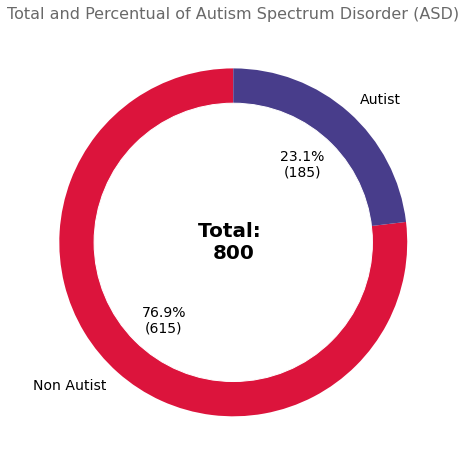

In [15]:

from pycomp.viz.insights import *

autism_map = {1: 'Autist', 0: 'Non Autist'}
autism_colors = ['crimson', 'darkslateblue']
plot_donut_chart(df=train, col='Class/ASD', label_names=autism_map, colors=autism_colors,
                 title='Total and Percentual of Autism Spectrum Disorder (ASD)')

Score based on Autism Spectrum Quotient (AQ) 10

In [46]:
train["A10_Score"].value_counts()

0    432
1    368
Name: A10_Score, dtype: int64

In [17]:
train["ethnicity"].value_counts()

White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

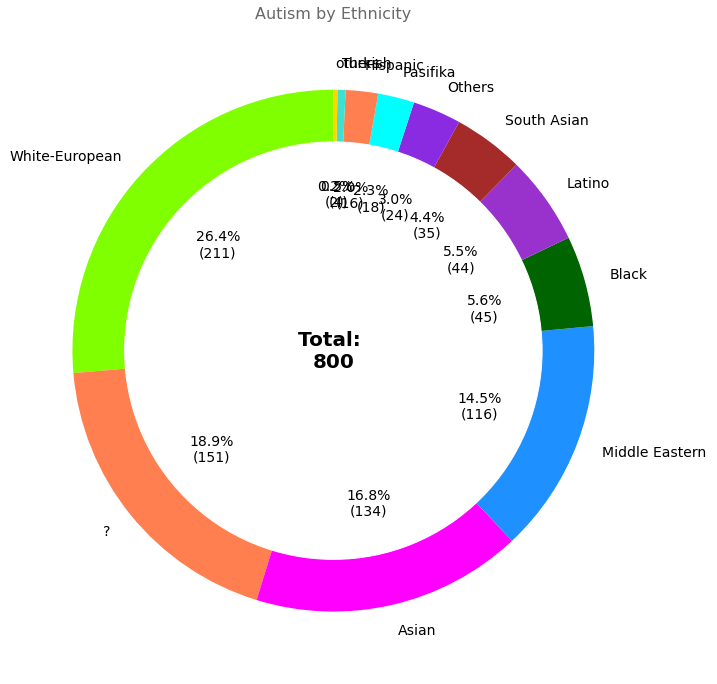

In [18]:
# etniksel oran

ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan','coral', 'Turquoise', 'Gold']
plot_donut_chart(df=train, col='ethnicity', colors=ethnicity_colors, figsize=(12, 12),
                 title='Autism by Ethnicity')

The chart above is overlapping, messy since there are many ethnicities. 

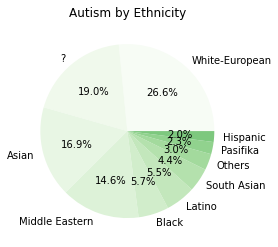

In [20]:
color = plt.cm.Greens(np.linspace(0,1,20))
train["ethnicity"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Class/ASD",colors=color,autopct="%0.1f%%")
plt.title("Autism by Ethnicity")
plt.axis("off")
plt.show()

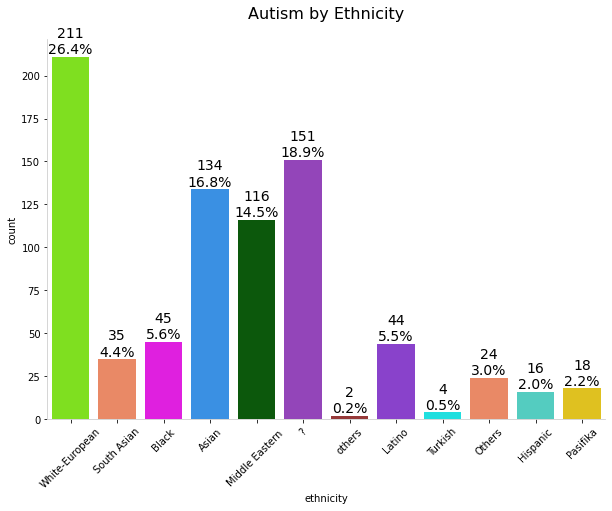

In [24]:

ethnicity_colors = ['chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'darkorchid', 'brown', 'BlueViolet', 'cyan','coral', 'Turquoise', 'Gold']

plot_countplot(df=train, col='ethnicity', palette=ethnicity_colors, 
               title='Autism by Ethnicity')
plt.xticks(rotation=45);

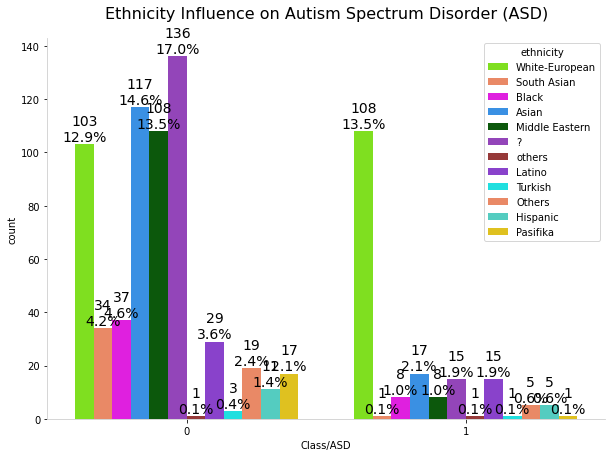

In [25]:

plot_countplot(df=train, col='Class/ASD', hue='ethnicity',  palette=ethnicity_colors,
               title="Ethnicity Influence on Autism Spectrum Disorder (ASD)")

CİNSİYETE GÖRE DAĞILIM

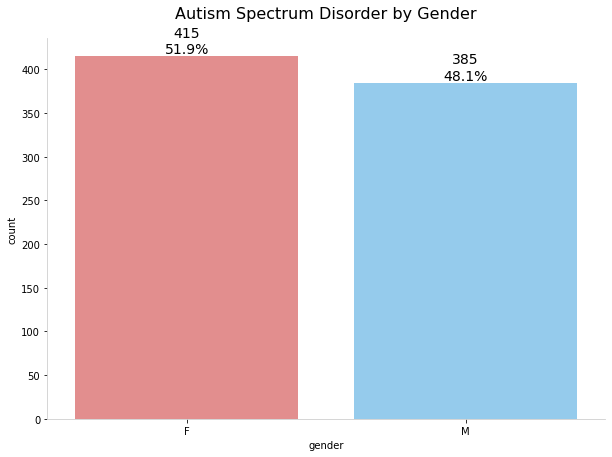

In [29]:

# Yeni değişken adları ve argüman sırası
color_scheme = ['lightcoral', 'lightskyblue']
gender_dict = {'m': 'M', 'f': 'F'}

plot_countplot(
    df=train,
    col='gender',
    palette=color_scheme,
    label_names=gender_dict,
    title='Autism Spectrum Disorder by Gender'
)

“Sarılık, diğer adıyla ikter, yüksek bilirubin seviyeleri nedeniyle cildin ve göz beyazlarının sarımsı veya yeşilimsi bir renk almasıdır.”

Kaynak: Wikipedia - Jaundice
“Sarılık geçiren bebeklerin, erken çocukluk döneminde otizm tanısı alma olasılığı %67 daha yüksekti. Bu risk, sonbahar ve kış aylarında doğan bebekler için daha da yüksekti. Ancak, daha önce doğum yapmamış annelerin bebeklerinde ve ilkbahar ile yaz aylarında doğan bebeklerde bu risk ortadan kalkıyordu.”

Kaynak: WebMD - Sarılık ve Otizm Bağlantısı

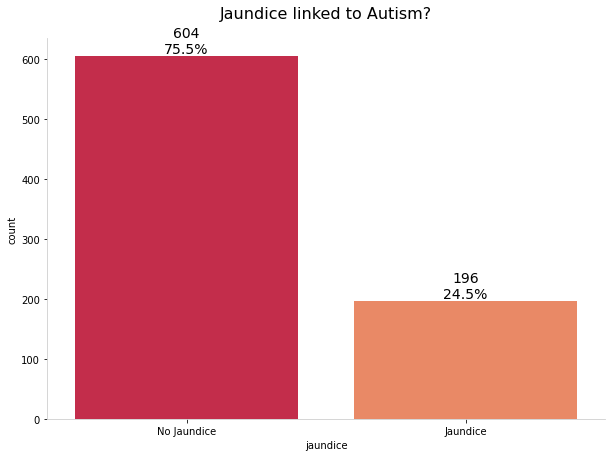

In [27]:
# Sarılık ve Otizm Arasındaki İlişki
jaundice_shades = ['crimson', 'coral']
jaundice_labels = {'yes': 'Jaundice', 'no': 'No Jaundice'}

plot_countplot(
    col='jaundice',
    df=train,
    palette=jaundice_shades,
    label_names=jaundice_labels,
    title='Jaundice linked to Autism?'
)

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41372-019-0452-4/MediaObjects/41372_2019_452_Fig1_HTML.png)nature.com

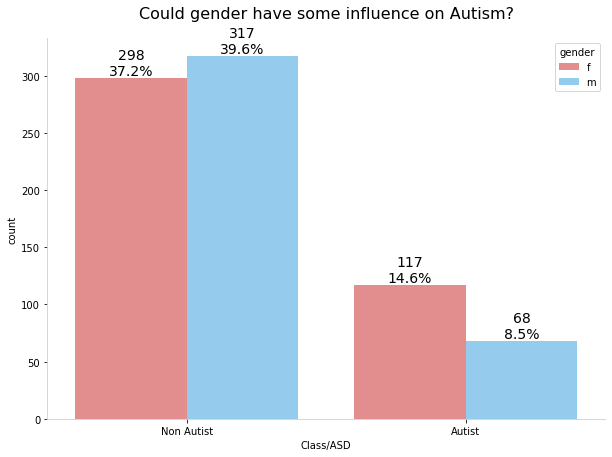

In [30]:
# OTİZM CİNSİYET DAĞILIMI
plot_countplot(df=train, col='Class/ASD', hue='gender', label_names=autism_map, palette=gender_colors,
               title="Could gender have some influence on Autism?")

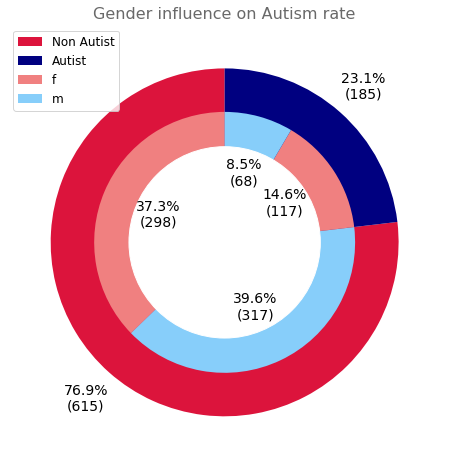

In [31]:

plot_double_donut_chart(df=train, col1='Class/ASD', col2='gender', label_names_col1=autism_map, 
                        colors1=['crimson', 'navy'], colors2=['lightcoral', 'lightskyblue'],
                        title="Gender influence on Autism rate")

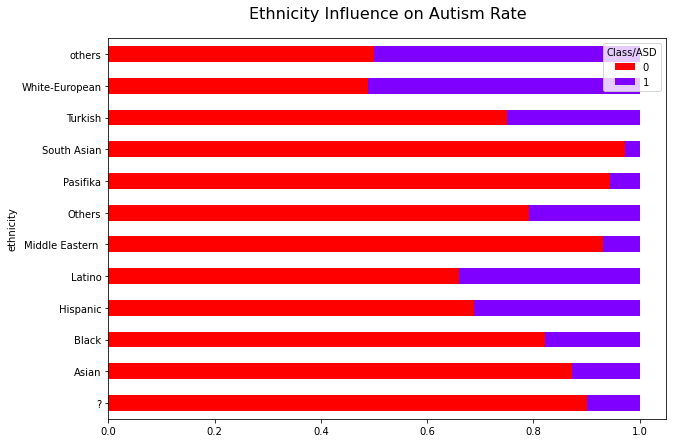

In [32]:
plot_pct_countplot(df=train, col='ethnicity', hue='Class/ASD', palette='rainbow_r',
                   title='Ethnicity Influence on Autism Rate')

#Autism column - Whether an immediate family member has been diagnosed with autism

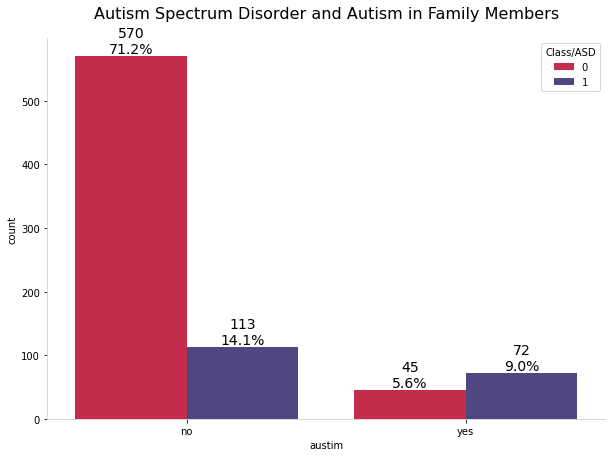

In [34]:
# Relationship between Autism in Family Members and Autism
plot_countplot(df=train, col='austim', hue='Class/ASD', orient='v', palette=autism_colors,
               title='Autism Spectrum Disorder and Autism in Family Members')

used_app_before Sütunu
	•	Hastanın daha önce bir tarama testinden geçip geçmediğini belirtir.

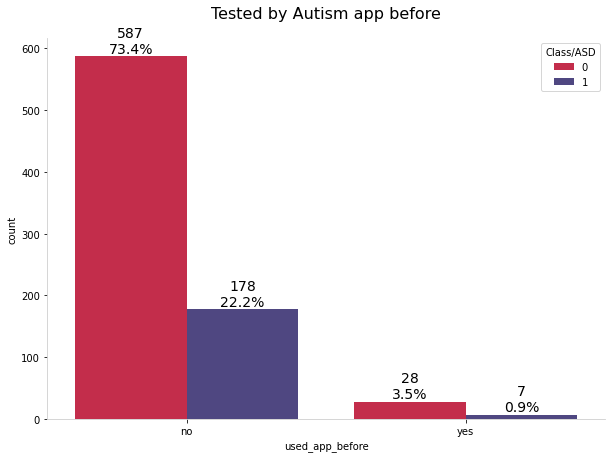

In [36]:
# used_app_before ve Otizm Arasındaki İlişki
plot_countplot(df=train, col='used_app_before', hue='Class/ASD', orient='v', palette=autism_colors,
               title='Tested by Autism app before')

Test Edilen Otizm Hastaları ile İlişki

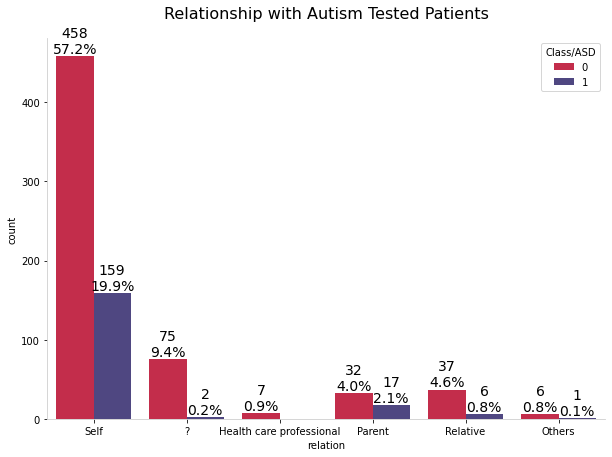

In [39]:
#Test Edilen Otizm Hastaları ile İlişki
plot_countplot(df=train, col='relation', hue='Class/ASD', orient='v', palette=autism_colors,
               title='Relationship with Autism Tested Patients')

Brezilya Otizm Spektrum Bozukluğu (ASD) Verisi

In [45]:
bra = train[(train['contry_of_res']=='Brazil')].reset_index(drop=True)
bra.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,502,1,0,0,0,0,0,1,0,0,0,21.554188,f,Pasifika,no,no,Brazil,no,8.660954,18 and more,Self,0
5,521,0,0,0,0,0,0,0,0,0,0,39.956806,f,Asian,no,no,Brazil,no,3.553688,18 and more,Parent,0
6,598,0,0,0,0,0,0,0,1,0,0,14.380895,m,Latino,yes,no,Brazil,no,5.134490,18 and more,?,0
7,677,1,0,1,1,1,0,1,1,0,1,24.527256,f,White-European,no,no,Brazil,no,12.709870,18 and more,Self,0
8,794,1,0,0,0,0,0,1,0,0,0,16.303972,f,Hispanic,no,no,Brazil,no,7.728628,18 and more,Self,0


#A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

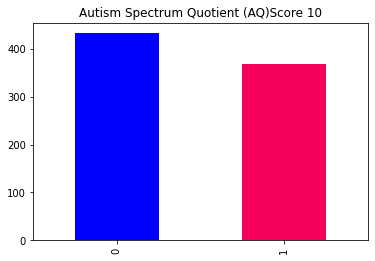

In [48]:

train["A10_Score"].value_counts().plot.bar(color=['blue', '#f5005a'], title='Autism Spectrum Quotient (AQ)Score 10');              

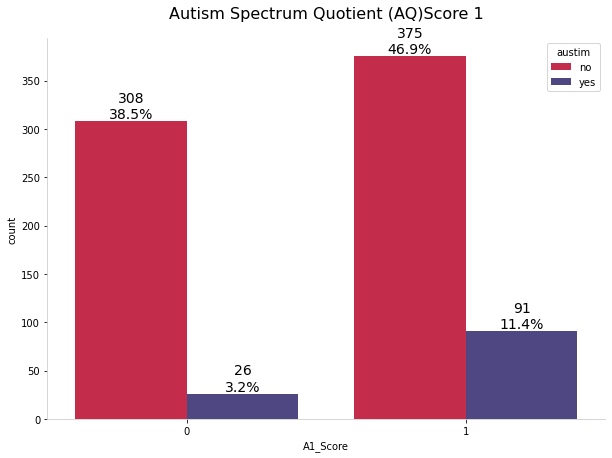

In [49]:
# Otizm Spektrum Katsayısı (AQ)Score 1 
plot_countplot(df=train, col='A1_Score', hue='austim', orient='v', palette=autism_colors,
               title='Autism Spectrum Quotient (AQ)Score 1')

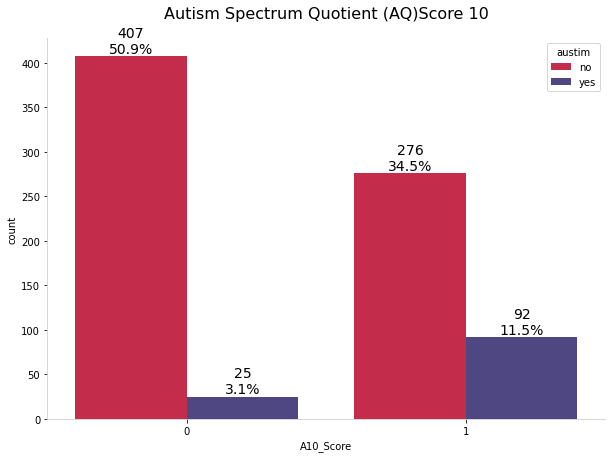

In [50]:

plot_countplot(df=train, col='A10_Score', hue='austim', orient='v', palette=autism_colors,
               title='Autism Spectrum Quotient (AQ)Score 10')

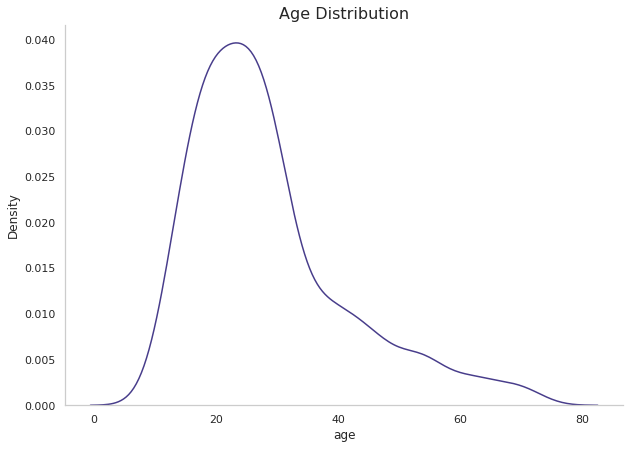

In [51]:
# Yaş Değişkeninin Dağılımı
plot_distplot(df=train, col='age', title="Age Distribution")

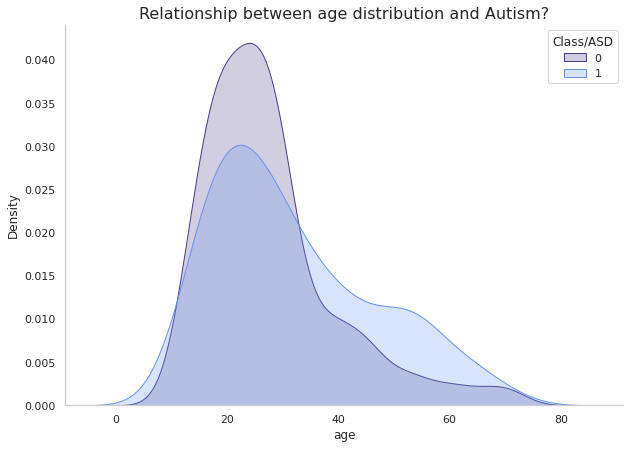

In [52]:
plot_distplot(df=train, col='age', hue='Class/ASD', kind='kde',
              title="Relationship between age distribution and Autism?")

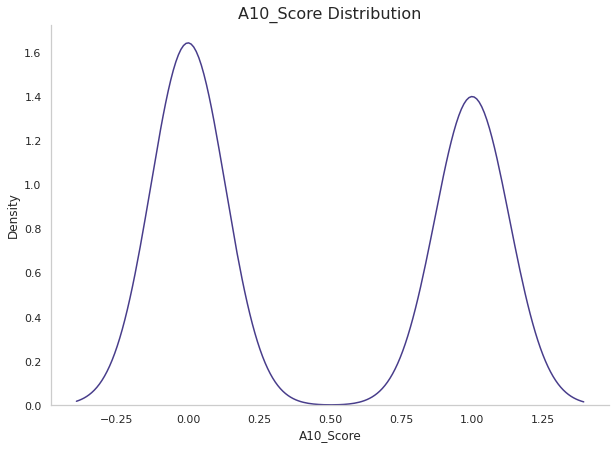

In [53]:
plot_distplot(df=train, col='A10_Score', title='A10_Score Distribution')

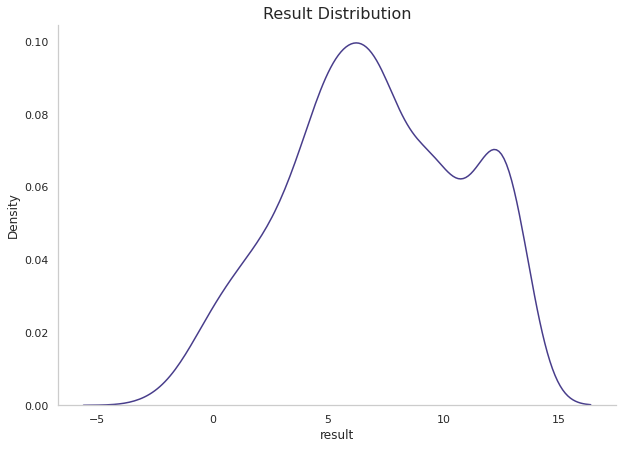

In [55]:
plot_distplot(df=train, col='result', title='Result Distribution')